# Research Question No. 4
What is the comparative performance of learning algorithms in long-lived bug prediction in FLOSS project? This research question aims to compare the accuracy of the long-lived bug prediction made by different classification algorithms. Here the algorithm with the best prediction capabilities is best fit in terms of balanced accuracy.

# 1. Setup environment.

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

# Setup Matplotlib
plt.rc('figure', figsize=(15, 15))
plt.style.use('default')
SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
%matplotlib inline 

# Setup Seaborn
sns.set_context("paper")
sns.set_style("ticks")


pd.set_option('display.max_columns', None)

e1_metrics_path  = "datasets/20190918180550_rq4e1_eclipse_predict_long_lived_metrics.csv"
e1_tests_path    = "datasets/20190918180550_rq4e1_eclipse_predict_long_lived_tests_balanced_acc.csv"
e2_metrics_path  = "datasets/20190925194105_rq4e2_eclipse_predict_long_lived_metrics.csv"
e2_tests_path    = "datasets/20190925194105_rq4e2_eclipse_predict_long_lived_tests_balanced_acc.csv"

e3_metrics_path  = "datasets/20190925200836_rq4e3_eclipse_predict_long_lived_metrics.csv"
e3_tests_path    = "datasets/20190925200836_rq4e3_eclipse_test_results_balanced_acc.csv"

#e4_metrics_path  = "datasets/20190926143854_rq4e4_gcc_predict_long_lived_metrics.csv"
#e4_tests_path    = "datasets/20190926143854_rq4e4_gcc_tests_balanced_acc.csv"

e4_metrics_path  = "datasets/rq4e4_gcc_predict_long_lived_metrics.csv"
e4_tests_path    = "datasets/rq4e4_gcc_tests_balanced_acc.csv"


bug_reports_path = "datasets/20190917_eclipse_bug_report_data.csv"
bug_reports_gcc_path = "datasets/20190917_gcc_bug_report_data.csv"
print("Setup complete")

Setup complete


# 2. Load data.

In [4]:
    !echo "\nHeader of metrics file $e1_metrics_path"
    !head -n 2 $e1_metrics_path

    !echo "\nNumber of lines in the file $e1_metrics_path"
    !wc -l $e1_metrics_path

    !echo "\nHeader of metrics file $e2_metrics_path"
    !head -n 2 $e2_metrics_path

    !echo "\nNumber of lines in the file $e2_metrics_path"
    !wc -l $e2_metrics_path
    
    !echo "\nHeader of metrics file $e3_metrics_path"
    !head -n 2 $e3_metrics_path

    !echo "\nNumber of lines in the file $e3_metrics_path"
    !wc -l $e3_metrics_path
    
    !echo "\nHeader of metrics file $e4_metrics_path"
    !head -n 2 $e4_metrics_path

    !echo "\nNumber of lines in the file $e4_metrics_path"
    !wc -l $e4_metrics_path


\nHeader of metrics file datasets/20190918180550_rq4e1_eclipse_predict_long_lived_metrics.csv
project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_class_0,test_size_class_1,tp,fn,fp,tn,sensitivity,specificity,balanced_acc,balanced_acc_manual,precision,recall,fmeasure
eclipse,long_description,100,nn,smote,repeatedcv,Accuracy,365,12847,6665,6182,2408,2221,187,71,116,656,1565,0.379679144385027,0.704637550652859,0.542158347518943,0.542158347518943,0.097661623108666,0.379679144385027,0.155361050328228
\nNumber of lines in the file datasets/20190918180550_rq4e1_eclipse_predict_long_lived_metrics.csv
61 datasets/20190918180550_rq4e1_eclipse_predict_long_lived_metrics.csv
\nHeader of metrics file datasets/20190925194105_rq4e2_eclipse_predict_long_lived_metrics.csv
project,feature,n_term,classifier,balancing,resampling,metric,threshold,train_size,train_size_class_0,train_size_class_1,test_size,test_size_clas

In [5]:
# read metrics data.
e1_metrics_data = pd.read_csv(e1_metrics_path)
rows_and_cols = e1_metrics_data.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {e1_metrics_path}.\n")

e2_metrics_data = pd.read_csv(e2_metrics_path)
rows_and_cols = e2_metrics_data.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {e2_metrics_path}.\n")

e3_metrics_data = pd.read_csv(e3_metrics_path)
rows_and_cols = e3_metrics_data.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {e3_metrics_path}.\n")

e4_metrics_data = pd.read_csv(e4_metrics_path)
rows_and_cols = e4_metrics_data.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {e4_metrics_path}.\n")

There are 60 rows and 25 columns in datasets/20190918180550_rq4e1_eclipse_predict_long_lived_metrics.csv.

There are 5 rows and 25 columns in datasets/20190925194105_rq4e2_eclipse_predict_long_lived_metrics.csv.

There are 4 rows and 25 columns in datasets/20190925200836_rq4e3_eclipse_predict_long_lived_metrics.csv.

There are 6 rows and 25 columns in datasets/rq4e4_gcc_predict_long_lived_metrics.csv.



# 3. First Experiment

## Experimental parameters


| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 | KNN, NB, NN, SVM, RF |
| Metrics                    | Accuracy, Kappa, ROC |
| Features                   | Short and Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Unbalance, Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 3.1 Review the data

### Best Balanced Accuracy Scores

In [6]:
e1_metrics_data.head()


project            feature  n_term classifier   balancing  resampling  \
0  eclipse   long_description     100         nn       smote  repeatedcv   
1  eclipse   long_description     100         nn       smote  repeatedcv   
2  eclipse  short_description     100         nb  unbalanced  repeatedcv   
3  eclipse  short_description     100         nb  unbalanced  repeatedcv   
4  eclipse   long_description     100         rf       smote  repeatedcv   

     metric  threshold  train_size  train_size_class_0  train_size_class_1  \
0  Accuracy        365       12847                6665                6182   
1     Kappa        365       12847                6665                6182   
2     Kappa        365        6335                5846                 489   
3       ROC        365        6335                5846                 489   
4  Accuracy        365       12847                6665                6182   

   test_size  test_size_class_0  test_size_class_1   tp   fn    fp    tn  \
0       2408               2221                187   71  116   656  1565   
1       2408               2221                187   71  116   656  1565   
2       2110               1948                162  102   60  1068   880   
3       2110               1948                162  102   60  1068   880   
4       2408               2221                187   20  167   102  2119   

   sensitivity  specificity  balanced_acc  balanced_acc_manual  precision  \
0     0.379679     0.704638      0.542158             0.542158   0.097662   
1     0.379679     0.704638      0.542158             0.542158   0.097662   
2     0.629630     0.451745      0.540688             0.540688   0.087179   
3     0.629630     0.451745      0.540688             0.540688   0.087179   
4     0.106952     0.954075      0.530513             0.530513   0.163934   

     recall  fmeasure  
0  0.379679  0.155361  
1  0.379679  0.155361  
2  0.629630  0.153153  
3  0.629630  0.153153  
4  0.106952  0.129450

In [17]:
# the best tunes
best_tunes_data = pd.read_csv("datasets/20200724_rq3e1_all_best_train_tunes_final.csv",  sep=",")

In [18]:
best_tunes_data

project            feature  n_term classifier   balancing  resampling  \
0  eclipse   long_description     100        knn       smote  repeatedcv   
1  eclipse  short_description     100         nb  unbalanced  repeatedcv   
2  eclipse   long_description     100         nn       smote  repeatedcv   
3  eclipse   long_description     100         rf       smote  repeatedcv   
4  eclipse   long_description     100        svm       smote  repeatedcv   

     metric  threshold  train_size  train_size_class_0  train_size_class_1  \
0       ROC        365       12847                6665                6182   
1       ROC        365        6335                5846                 489   
2  Accuracy        365       12847                6665                6182   
3  Accuracy        365       12847                6665                6182   
4  Accuracy        365       12847                6665                6182   

   test_size  test_size_class_0  test_size_class_1   tp   fn    fp    tn  \
0       2408               2221                187  112   75  1227   994   
1       2110               1948                162  102   60  1068   880   
2       2408               2221                187   71  116   656  1565   
3       2408               2221                187   20  167   102  2119   
4       2408               2221                187   11  176    84  2137   

   sensitivity  specificity  balanced_acc  balanced_acc_manual  precision  \
0     0.598930     0.447546      0.523238             0.523238   0.083645   
1     0.629630     0.451745      0.540688             0.540688   0.087179   
2     0.379679     0.704638      0.542158             0.542158   0.097662   
3     0.106952     0.954075      0.530513             0.530513   0.163934   
4     0.058824     0.962179      0.510501             0.510501   0.115789   

     recall  fmeasure hyper1    value1     hyper2  value2  hyper3  value3  
0  0.598930  0.146789      k   5.00000        NaN     0.0     NaN       0  
1  0.629630  0.153153     fL   0.00000  usekernel     0.0  adjust       0  
2  0.379679  0.155361   size  20.00000      decay     0.5     NaN       0  
3  0.106952  0.129450   mtry  25.00000        NaN     0.0     NaN       0  
4  0.058824  0.078014  sigma   0.03125          C    32.0     NaN       0

In [19]:
fold_metrics_data = pd.read_csv("datasets/20200724_rq3e1_train_fold_metrics_eclipse_final.csv",  sep=",")

In [20]:
fold_metrics_table = pd.pivot_table (fold_metrics_data, index=['seed','Resample'], columns='classifier', values=['sensitivity', 'specificity', 'balanced_acc'])

In [21]:
#table.to_csv('datasets/_fold_mestrics.csv')
fold_metrics_table

balanced_acc                                          \
classifier             knn        nb        nn        rf       svm   
seed Resample                                                        
144  Fold01       0.836927  0.445345  0.775593  0.953956  0.978257   
     Fold02       0.836167  0.453174  0.753605  0.938286  0.978256   
     Fold03       0.844866  0.444263  0.738473  0.953117  0.981973   
     Fold04       0.832489  0.457424  0.731402  0.951637  0.985825   
     Fold05       0.844098  0.446971  0.763569  0.953861  0.985849   
     Fold06       0.843536  0.453127  0.753449  0.950235  0.972370   
     Fold07       0.836923  0.441685  0.741063  0.958536  0.984250   
     Fold08       0.840683  0.447576  0.744591  0.964870  0.985828   
     Fold09       0.838074  0.192232  0.736305  0.944543  0.975957   
     Fold10       0.843193  0.441453  0.788216  0.950848  0.979845   
283  Fold01       0.846413  0.455639  0.741416  0.953466  0.980453   
     Fold02       0.835216  0.450433  0.745670  0.956265  0.976539   
     Fold03       0.840789  0.445079  0.749434  0.956276  0.981155   
     Fold04       0.841235  0.445595  0.774417  0.953330  0.981284   
     Fold05       0.843796  0.448174  0.737649  0.943144  0.986594   
     Fold06       0.840684  0.452170  0.770046  0.952403  0.984266   
     Fold07       0.836176  0.440268  0.788183  0.949227  0.983478   
     Fold08       0.838943  0.442777  0.770170  0.952608  0.983568   
     Fold09       0.841436  0.440362  0.769647  0.943776  0.986595   
     Fold10       0.843333  0.450834  0.751012  0.959312  0.988918   
1087 Fold01       0.841479  0.453715  0.776504  0.954798  0.981973   
     Fold02       0.850946  0.454552  0.780244  0.949489  0.982812   
     Fold03       0.840327  0.452260  0.739210  0.953087  0.982708   
     Fold04       0.835972  0.456301  0.738006  0.948565  0.982039   
     Fold05       0.846025  0.446247  0.744893  0.963248  0.985023   
     Fold06       0.848533  0.453220  0.733305  0.941491  0.980503   
     Fold07       0.836968  0.450574  0.742140  0.946845  0.972772   
     Fold08       0.834595  0.443519  0.714911  0.954733  0.981969   
     Fold09       0.845638  0.443547  0.761471  0.953206  0.982734   
     Fold10       0.841436  0.442211  0.735448  0.961721  0.980362   
2293 Fold01       0.838445  0.448504  0.749882  0.950946  0.983529   
     Fold02       0.841235  0.448209  0.721610  0.955583  0.977546   
     Fold03       0.844186  0.442413  0.765434  0.954722  0.981150   
     Fold04       0.836601  0.438551  0.777059  0.946305  0.981179   
     Fold05       0.841860  0.452890  0.763825  0.947040  0.979697   
     Fold06       0.836927  0.453421  0.745921  0.964019  0.977589   
     Fold07       0.842038  0.451775  0.758821  0.967249  0.985059   
     Fold08       0.830556  0.192232  0.709654  0.939216  0.976582   
     Fold09       0.830835  0.445825  0.756031  0.962647  0.982012   
     Fold10       0.842193  0.192232  0.762765  0.946203  0.982697   
3581 Fold01       0.844482  0.444753  0.735705  0.961761  0.985849   
     Fold02       0.849825  0.447228  0.741121  0.951603  0.982708   
     Fold03       0.840330  0.192232  0.728862  0.951551  0.977447   
     Fold04       0.836235  0.440719  0.728153  0.947657  0.984254   
     Fold05       0.844866  0.451525  0.746150  0.953257  0.980560   
     Fold06       0.843702  0.455274  0.776490  0.955663  0.974364   
     Fold07       0.863529  0.451825  0.741671  0.955419  0.985824   
     Fold08       0.842135  0.452697  0.725230  0.960193  0.985080   
     Fold09       0.832974  0.438277  0.725241  0.943086  0.983501   
     Fold10       0.841311  0.452186  0.758080  0.939874  0.974277   

              sensitivity                                         specificity  \
classifier            knn        nb        nn        rf       svm         knn   
seed Resample                                                                   
144  Fold01      0.676535  0.040462  0.727145  0.950081  0.9

In [22]:
classifiers = ['knn', 'nb', 'nn', 'rf', 'svm']
statistics  = pd.DataFrame(columns=['classifier1', 'mean1', 'classifier2', 'mean2', 'condition', 'direction'])

for classifier1 in classifiers:
    sample1 = fold_metrics_table.loc[:, (slice('balanced_acc'), classifier1)].values 
    mean1   = np.mean(sample1)
    for classifier2 in classifiers:
        sample2 = fold_metrics_table.loc[:, (slice('balanced_acc'), classifier2)].values
        mean2   = np.mean(sample2)
        condition = True
        p  = 1.0
        if (classifier1 != classifier2):
            stat, p = wilcoxon(sample1.flatten(), sample2.flatten())
            print('Statistics=%.3f, p=%.3f mean1=%.3f mean2=%.3f'  % (stat, p, mean1, mean2))
    
            alpha = 0.05
            condition = p > alpha
            if condition:
                print(f"{classifier1} has a same distributions of {classifier2} (fail to reject H0)")
            else:
                print(f"{classifier1} has a different distribution of {classifier2} (reject H0)")
            
        statistics = statistics.append(
            {'classifier1': classifier1, 
             'mean1': mean1, 
             'classifier2': classifier2,
             'mean2': mean2,
             'condition': condition,
             'direction': '-' if condition else '$\\leftarrow$' if mean1 > mean2 else '$\\uparrow$'}
            , ignore_index=True
        )
    

Statistics=0.000, p=0.000 mean1=0.841 mean2=0.428
knn has a different distribution of nb (reject H0)
Statistics=0.000, p=0.000 mean1=0.841 mean2=0.750
knn has a different distribution of nn (reject H0)
Statistics=0.000, p=0.000 mean1=0.841 mean2=0.952
knn has a different distribution of rf (reject H0)
Statistics=0.000, p=0.000 mean1=0.841 mean2=0.982
knn has a different distribution of svm (reject H0)
Statistics=0.000, p=0.000 mean1=0.428 mean2=0.841
nb has a different distribution of knn (reject H0)
Statistics=0.000, p=0.000 mean1=0.428 mean2=0.750
nb has a different distribution of nn (reject H0)
Statistics=0.000, p=0.000 mean1=0.428 mean2=0.952
nb has a different distribution of rf (reject H0)
Statistics=0.000, p=0.000 mean1=0.428 mean2=0.982
nb has a different distribution of svm (reject H0)
Statistics=0.000, p=0.000 mean1=0.750 mean2=0.841
nn has a different distribution of knn (reject H0)
Statistics=0.000, p=0.000 mean1=0.750 mean2=0.428
nn has a different distribution of nb (rej

In [37]:
s = statistics[['classifier1', 'classifier2', 'direction']]
s = s.pivot(index='classifier1', columns='classifier2', values='direction')
s.to_csv('/tmp/tabela_teste_estatistico.csv', index=True)

In [104]:
statistics_pivoted=pd.pivot_table(statistics, index=['classifier1'], columns=['classifier2'], values=['mean1', 'mean2'])
statistics_pivoted

mean1                                             mean2  \
classifier2       knn        nb        nn        rf       svm       knn   
classifier1                                                               
knn          0.841023  0.841023  0.841023  0.841023  0.841023  0.841023   
nb           0.427670  0.427670  0.427670  0.427670  0.427670  0.841023   
nn           0.750155  0.750155  0.750155  0.750155  0.750155  0.841023   
rf           0.952417  0.952417  0.952417  0.952417  0.952417  0.841023   
svm          0.981501  0.981501  0.981501  0.981501  0.981501  0.841023   

                                                    
classifier2       nb        nn        rf       svm  
classifier1                                         
knn          0.42767  0.750155  0.952417  0.981501  
nb           0.42767  0.750155  0.952417  0.981501  
nn           0.42767  0.750155  0.952417  0.981501  
rf           0.42767  0.750155  0.952417  0.981501  
svm          0.42767  0.750155  0.952417  0.981501

### Best Sensitivity Scores

In [7]:
e1_metrics_data.sort_values('sensitivity', ascending=False).head()

project            feature  n_term classifier   balancing  resampling  \
51  eclipse  short_description     100         nb       smote  repeatedcv   
7   eclipse   long_description     100         nb  unbalanced  repeatedcv   
8   eclipse   long_description     100         nb  unbalanced  repeatedcv   
2   eclipse  short_description     100         nb  unbalanced  repeatedcv   
3   eclipse  short_description     100         nb  unbalanced  repeatedcv   

   metric  threshold  train_size  train_size_class_0  train_size_class_1  \
51    ROC        365       11225                5846                5379   
7   Kappa        365        7227                6665                 562   
8     ROC        365        7227                6665                 562   
2   Kappa        365        6335                5846                 489   
3     ROC        365        6335                5846                 489   

    test_size  test_size_class_0  test_size_class_1   tp  fn    fp   tn  \
51       2110               1948                162  159   3  1916   32   
7        2408               2221                187  120  67  1313  908   
8        2408               2221                187  120  67  1313  908   
2        2110               1948                162  102  60  1068  880   
3        2110               1948                162  102  60  1068  880   

    sensitivity  specificity  balanced_acc  balanced_acc_manual  precision  \
51     0.981481     0.016427      0.498954             0.498954   0.076627   
7      0.641711     0.408825      0.525268             0.525268   0.083740   
8      0.641711     0.408825      0.525268             0.525268   0.083740   
2      0.629630     0.451745      0.540688             0.540688   0.087179   
3      0.629630     0.451745      0.540688             0.540688   0.087179   

      recall  fmeasure  
51  0.981481  0.142155  
7   0.641711  0.148148  
8   0.641711  0.148148  
2   0.629630  0.153153  
3   0.629630  0.153153

#### Legenda:
* **Sensitivity:** corresponde à taxa de acerto na classe positiva. Também chamada de taxa de verdadeiros positivos: TP / ( TP + FN ).
* **Specificity:** corresponde à taxa de acerto na classe negativa: TN / ( TN + FP ).
* **Balanced Accuracy:** (Sensibilidade + Especificidade)/2.


## 3.2 Evaluation Metrics

### Sensitivity ###
Corresponde à taxa de acerto na classe positiva. Também é chamada de taxa de verdadeiros positivos: TP/(TP+FN). 

<Figure size 432x288 with 0 Axes>

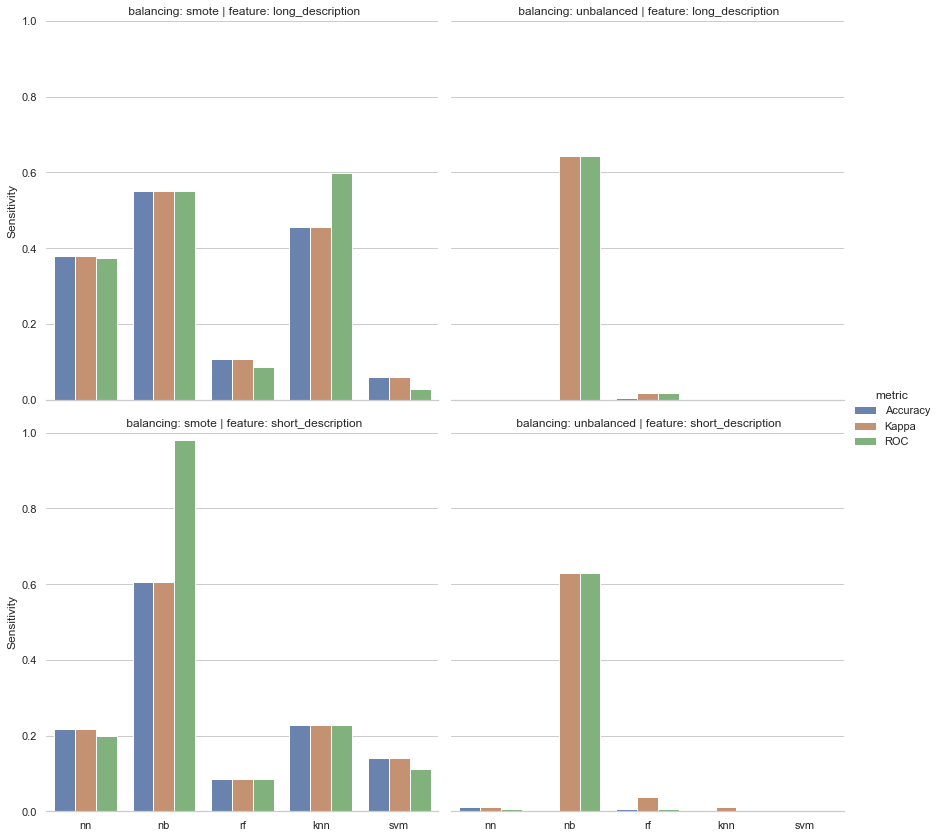

In [8]:
sns.despine(offset=5)
sns.set(style="whitegrid")
g = sns.catplot(data=e1_metrics_data
                , kind="bar"
                , x="classifier"
                , y="sensitivity"
                , hue="metric"
                , col="balancing"
                , row="feature"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Sensitivity")
  .set_titles(" {col_var}: {col_name} | {row_var}: {row_name}")
  .set(ylim=(0, 1))
  .despine(left=True))

### Specificity ###
Corresponde à taxa de acerto na classe negativa: TN/(TN+FP). 

<Figure size 432x288 with 0 Axes>

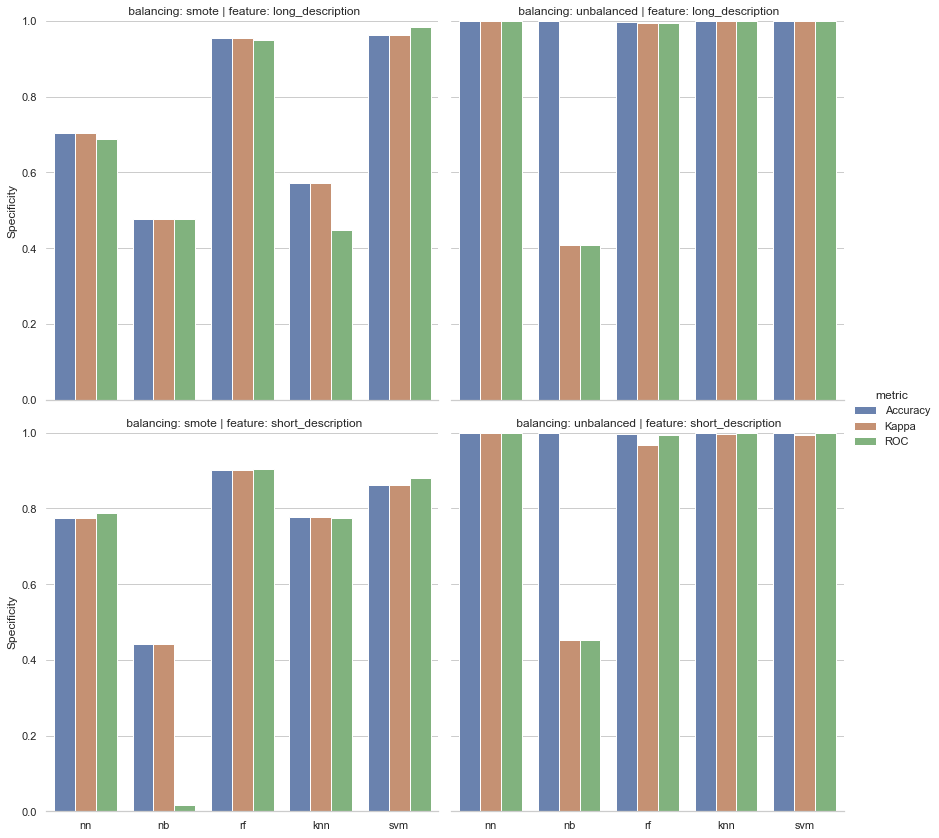

In [9]:
sns.despine(offset=5)
sns.set(style="whitegrid")
g = sns.catplot(data=e1_metrics_data
                , kind="bar"
                , x="classifier"
                , y="specificity"
                , hue="metric"
                , col="balancing"
                , row="feature"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Specificity")
  .set_titles(" {col_var}: {col_name} | {row_var}: {row_name}")
  .set(ylim=(0, 1))
  .despine(left=True))

### Balanced Accuracy
Accurácia balanceada: (sensitivity + specificity)/2

<Figure size 432x288 with 0 Axes>

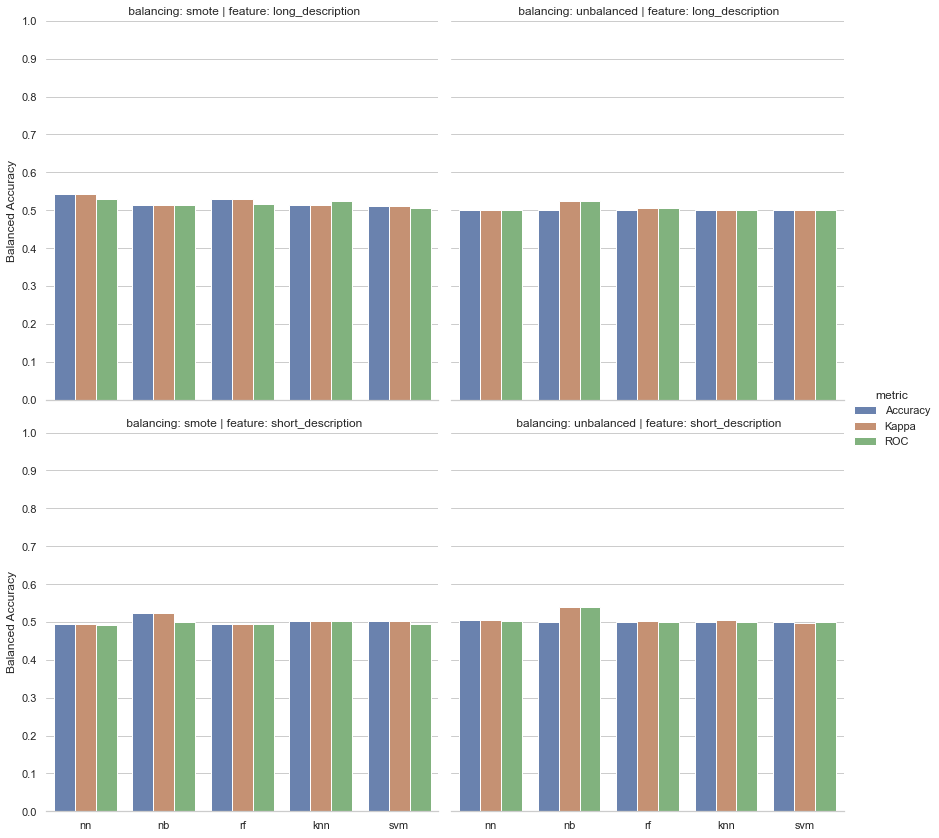

In [10]:
sns.despine(offset=5)
sns.set(style="whitegrid")
g = sns.catplot(data=e1_metrics_data
                , kind="bar"
                , x="classifier"
                , y="balanced_acc"
                , hue="metric"
                , col="balancing"
                , row="feature"
                , saturation=.5
                , height=6
                , palette="muted")
(g.set_axis_labels("", "Balanced Accuracy")
  .set_titles(" {col_var}: {col_name} | {row_var}: {row_name}")
  .set(yticks=np.arange(0, 1.1, 0.1))
  .set(ylim=(0, 1))
  .despine(left=True))

## 3.3 Statistical Test

### Balanced Accuracy 

In [11]:
# read data per classifier
knn = e1_metrics_data[e1_metrics_data['classifier'] == 'knn'].balanced_acc
nb  = e1_metrics_data[e1_metrics_data['classifier'] == 'nb'].balanced_acc
nn  = e1_metrics_data[e1_metrics_data['classifier'] == 'nn'].balanced_acc
rf  = e1_metrics_data[e1_metrics_data['classifier'] == 'rf'].balanced_acc
svm = e1_metrics_data[e1_metrics_data['classifier'] == 'svm'].balanced_acc

# compare samples with Friedman Test
stat, p = kruskal(knn, nb, nn, rf, svm)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Statistics=6.604, p=0.158
Same distributions (fail to reject H0)


### Sensitivity

In [12]:
# read data per classifier
knn = e1_metrics_data[e1_metrics_data['classifier'] == 'knn'].sensitivity
nb  = e1_metrics_data[e1_metrics_data['classifier'] == 'nb'].sensitivity
nn  = e1_metrics_data[e1_metrics_data['classifier'] == 'nn'].sensitivity
rf  = e1_metrics_data[e1_metrics_data['classifier'] == 'rf'].sensitivity
svm = e1_metrics_data[e1_metrics_data['classifier'] == 'svm'].sensitivity

# compare samples with Friedman Test
stat, p = kruskal(knn, nb, nn, rf, svm)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=16.260, p=0.003
Different distributions (reject H0)


## 3.4. Test results

In [22]:
e1_tests_data = pd.read_csv(e1_tests_path)

In [23]:
bug_reports_data = pd.read_csv(bug_reports_path)
test_e1_merged_data = pd.merge(
    bug_reports_data,
    e1_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)

In [24]:
correct_predicted_bugs = test_e1_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

bug_id creation_date component_name product_name  \
48       JSDT-212668    2007-12-11        General         JSDT   
86    ASPECTJ-166347    2006-11-30           Docs      ASPECTJ   
127   PLATFORM-56094    2004-03-25            SWT     PLATFORM   
187  PLATFORM-213305    2007-12-18            SWT     PLATFORM   
203   PLATFORM-31385    2003-02-07            SWT     PLATFORM   

                                     short_description  \
48        [hotbug] JavaScript validation error on JSPs   
86   AspectJ website points to wrong version of ajd...   
127  tracker resize uses screen coordinates instead...   
187   100% cpu usage on opening files with long lines.   
203          Redraw problems: selecting text backwards   

                                      long_description   assignee_name  \
48   This is a follow-on to bug 207589:\n\nI just t...          nitind   
86   The AspectJ documentation http://www.eclipse.o...   aspectj-inbox   
127  No matter what you use in tracker's first argu...     grant_gayed   
187  Created attachment 85458\nA java source file f...  eclipse.felipe   
203  eclipse 2.1I200302061700 linux-gtk j2sdk-1.4.1...  eclipse.felipe   

    reporter_name resolution_category  resolution_code status_category  \
48          kathy               fixed                1        resolved   
86      hlhawkins               fixed                1        resolved   
127       stromgt               fixed                1        resolved   
187        mascha               fixed                1        resolved   
203       nickell               fixed                1        resolved   

     status_code update_date  quantity_of_votes  quantity_of_comments  \
48             4  2010-03-03                  2                    14   
86             4  2008-08-21                  0                     2   
127            4  2005-04-13                  0                     3   
187            4  2014-02-25                  2                    24   
203            4  2004-06-28                  0                    23   

    resolution_date  bug_fix_time severity_category  severity_code long_lived  \
48       2009-02-12           429            normal              2          Y   
86       2008-08-21           630            normal              2          Y   
127      2005-04-13           384            normal              2          Y   
187      2009-02-04           414            normal              2          Y   
203      2004-06-28           507            normal              2          Y   

    y_hat  
48      Y  
86      Y  
127     Y  
187     Y  
203     Y

# 4. Second Experiment (RQ4.2)

## 4.1 Parameters


| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100, 150, 200, 250, 300       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 4.2 Review Data

In [25]:
e2_metrics_data.sort_values('balanced_acc', ascending=False).head()

project           feature  n_term classifier balancing  resampling  \
0  eclipse  long_description     100         nn     smote  repeatedcv   
1  eclipse  long_description     150         nn     smote  repeatedcv   
4  eclipse  long_description     300         nn     smote  repeatedcv   
2  eclipse  long_description     200         nn     smote  repeatedcv   
3  eclipse  long_description     250         nn     smote  repeatedcv   

     metric  threshold  train_size  train_size_class_0  train_size_class_1  \
0  Accuracy        365       12847                6665                6182   
1  Accuracy        365       12926                6700                6226   
4  Accuracy        365       12966                6729                6237   
2  Accuracy        365       12954                6717                6237   
3  Accuracy        365       12963                6726                6237   

   test_size  test_size_class_0  test_size_class_1  tp   fp    tn   fn  \
0       2408               2221                187  71  656  1565  116   
1       2421               2233                188  63  568  1665  125   
4       2432               2243                189  45  411  1832  144   
2       2426               2238                188  49  475  1763  139   
3       2429               2241                188  44  439  1802  144   

   sensitivity  specificity  balanced_acc  balanced_acc_manual  precision  \
0     0.379679     0.704638      0.542158             0.542158   0.097662   
1     0.335106     0.745634      0.540370             0.540370   0.099842   
4     0.238095     0.816763      0.527429             0.527429   0.098684   
2     0.260638     0.787757      0.524198             0.524198   0.093511   
3     0.234043     0.804105      0.519074             0.519074   0.091097   

     recall  fmeasure  
0  0.379679  0.155361  
1  0.335106  0.153846  
4  0.238095  0.139535  
2  0.260638  0.137640  
3  0.234043  0.131148

## 4.3 Evaluation Metrics

/home/luizgomes/apps/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


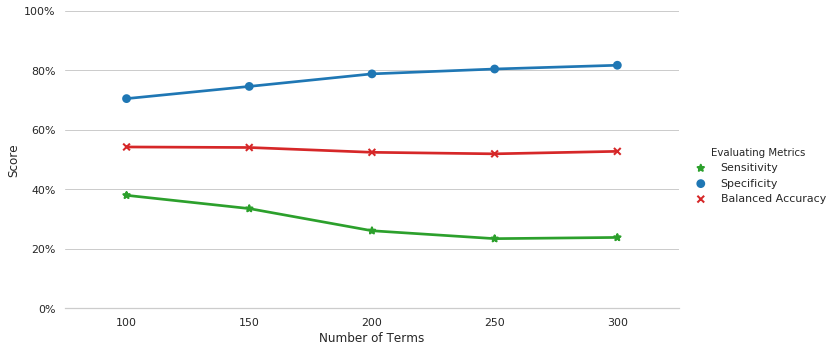

In [26]:
from  matplotlib.ticker import PercentFormatter
sns.set_context("paper")
sns.set(style="whitegrid", font_scale=1.0)
e2_metrics_data_melted = e2_metrics_data[['n_term', 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=['n_term']) 

g = sns.catplot(data=e2_metrics_data_melted
                , kind="point"
                , x="n_term"
                , y="value"
                , hue="variable"
                , saturation=.0
                , height=6
                , size=5
                , aspect=2
                , palette=["tab:green", "tab:blue", "tab:red"]
                , markers=["*", "o", "x"]
                #, linestyles=["-", "--", "dotted"]
                , legend_out=True)

(g.set_axis_labels("Number of Terms", "Score")
  .set_titles(" Balanced Accuracy: Neural Network")
  .set(ylim=(0, 1))
  .despine(left=True))

# Format y scale in percentage format. 
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change and ajust legend. 
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position
g._legend.set_title("Evaluating Metrics")
for t, l in zip(g._legend.texts, ['Sensitivity', 'Specificity', 'Balanced Accuracy']): t.set_text(l)

plt.show(g)
g.savefig(f"figures/rq4e2-eclipse-evaluation-metrics.pdf", format="pdf", dpi=600, bbox_inches='tight')

In [27]:
from  matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker

def plot_line(x_ticks, x_label, experiment, data, id_var):
    sns.set_context("paper")
    sns.set(style="ticks", color_codes=True)
    e2_metrics_data_melted = data[[id_var, 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=[id_var]) 

    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='sensitivity'], label="Sensitivity", marker='*', markerfacecolor='tab:green', markersize=8, color='tab:green', linewidth=2)
    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='specificity'], label="Specificity", marker='o', markerfacecolor='tab:blue',  markersize=8, color='tab:blue', linewidth=2)
    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='balanced_acc'], label="Balanced Accuracy", marker='x',markerfacecolor='tab:red',   markersize=8, color='tab:red', linewidth=2)
    sns.despine(offset=5)

    ax = plt.axes()
    
    plt.xticks(x_ticks)
    plt.xlabel(x_label, fontsize=SMALL_SIZE)
    
    plt.yticks(fontsize=SMALL_SIZE)
    plt.ylabel('Score', fontsize=SMALL_SIZE)
    plt.ylim(0, 1)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

    plt.title("Eclipse: Evaluation Metrics", fontsize=SMALL_SIZE)
    plt.legend()
    plt.savefig(f"figures/rq4e{experiment}-eclipse-evaluation-metrics.pdf", format="pdf", dpi=600, bbox_inches='tight')

/home/luizgomes/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


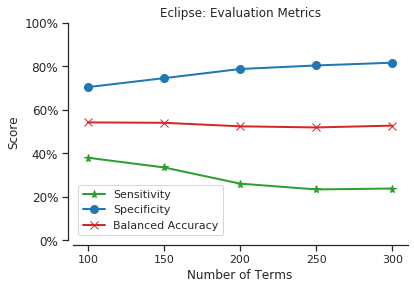

In [28]:
plot_line([100, 150, 200, 250, 300], "Number of Terms", "2", e2_metrics_data, "n_term")

## 4.4 Test Results

In [29]:
e2_tests_data = pd.read_csv(e2_tests_path)
bug_reports_data = pd.read_csv(bug_reports_path)
test_e2_merged_data = pd.merge(
    bug_reports_data,
    e2_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e2_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

bug_id creation_date component_name product_name  \
48       JSDT-212668    2007-12-11        General         JSDT   
86    ASPECTJ-166347    2006-11-30           Docs      ASPECTJ   
127   PLATFORM-56094    2004-03-25            SWT     PLATFORM   
187  PLATFORM-213305    2007-12-18            SWT     PLATFORM   
203   PLATFORM-31385    2003-02-07            SWT     PLATFORM   

                                     short_description  \
48        [hotbug] JavaScript validation error on JSPs   
86   AspectJ website points to wrong version of ajd...   
127  tracker resize uses screen coordinates instead...   
187   100% cpu usage on opening files with long lines.   
203          Redraw problems: selecting text backwards   

                                      long_description   assignee_name  \
48   This is a follow-on to bug 207589:\n\nI just t...          nitind   
86   The AspectJ documentation http://www.eclipse.o...   aspectj-inbox   
127  No matter what you use in tracker's first argu...     grant_gayed   
187  Created attachment 85458\nA java source file f...  eclipse.felipe   
203  eclipse 2.1I200302061700 linux-gtk j2sdk-1.4.1...  eclipse.felipe   

    reporter_name resolution_category  resolution_code status_category  \
48          kathy               fixed                1        resolved   
86      hlhawkins               fixed                1        resolved   
127       stromgt               fixed                1        resolved   
187        mascha               fixed                1        resolved   
203       nickell               fixed                1        resolved   

     status_code update_date  quantity_of_votes  quantity_of_comments  \
48             4  2010-03-03                  2                    14   
86             4  2008-08-21                  0                     2   
127            4  2005-04-13                  0                     3   
187            4  2014-02-25                  2                    24   
203            4  2004-06-28                  0                    23   

    resolution_date  bug_fix_time severity_category  severity_code long_lived  \
48       2009-02-12           429            normal              2          Y   
86       2008-08-21           630            normal              2          Y   
127      2005-04-13           384            normal              2          Y   
187      2009-02-04           414            normal              2          Y   
203      2004-06-28           507            normal              2          Y   

    y_hat  
48      Y  
86      Y  
127     Y  
187     Y  
203     Y

# 5. Third Experiment (RQ4.3)

## 5.1 Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        1, 8, 63, 365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 5.2 Review Data

In [30]:
e3_metrics_data.sort_values('balanced_acc', ascending=False).head()

project           feature  n_term classifier balancing  resampling  \
0  eclipse  long_description     100         nn     smote  repeatedcv   
3  eclipse  long_description     100         nn     smote  repeatedcv   
1  eclipse  long_description     100         nn     smote  repeatedcv   
2  eclipse  long_description     100         nn     smote  repeatedcv   

     metric  threshold  train_size  train_size_class_0  train_size_class_1  \
0  Accuracy          1        9401                4348                5053   
3  Accuracy        365       12847                6665                6182   
1  Accuracy          8        7227                3612                3615   
2  Accuracy         63        9039                5415                3624   

   test_size  test_size_class_0  test_size_class_1    tp   fp    tn   fn  \
0       2408                724               1684  1183  439   285  501   
3       2408               2221                187    71  656  1565  116   
1       2408               1203               1205   658  594   609  547   
2       2408               1805                603   103  269  1536  500   

   sensitivity  specificity  balanced_acc  balanced_acc_manual  precision  \
0     0.702494     0.393646      0.548070             0.548070   0.729346   
3     0.379679     0.704638      0.542158             0.542158   0.097662   
1     0.546058     0.506234      0.526146             0.526146   0.525559   
2     0.170813     0.850970      0.510891             0.510891   0.276882   

     recall  fmeasure  
0  0.702494  0.715668  
3  0.379679  0.155361  
1  0.546058  0.535613  
2  0.170813  0.211282

## 5.3 Evaluation Metrics

/home/luizgomes/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


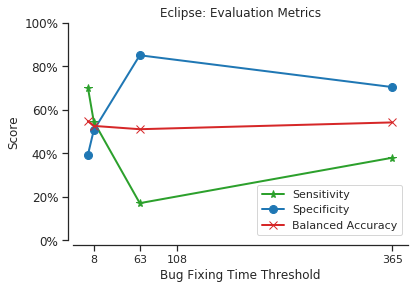

In [31]:
plot_line([8, 63, 108, 365], "Bug Fixing Time Threshold", "3", e3_metrics_data, "threshold")

## 5.4 Tests Results

In [32]:
e3_tests_data = pd.read_csv(e3_tests_path)
bug_reports_data = pd.read_csv(bug_reports_path)
test_e3_merged_data = pd.merge(
    bug_reports_data,
    e2_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e3_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

FileNotFoundError: [Errno 2] File b'datasets/20190925200836_rq4e3_eclipse_test_results_balanced_acc.csv' does not exist: b'datasets/20190925200836_rq4e3_eclipse_test_results_balanced_acc.csv'

# 6. Fourth Experiment

## 6.1 Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse, Freedesktop, Gcc, Gnome, Mozilla, WineHQ       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**.

## 6.2 Review Data

In [ ]:
e4_metrics_data.sort_values('balanced_acc', ascending=False).head(6)

## 6.3 Evaluation Metrics

<Figure size 640x480 with 0 Axes>

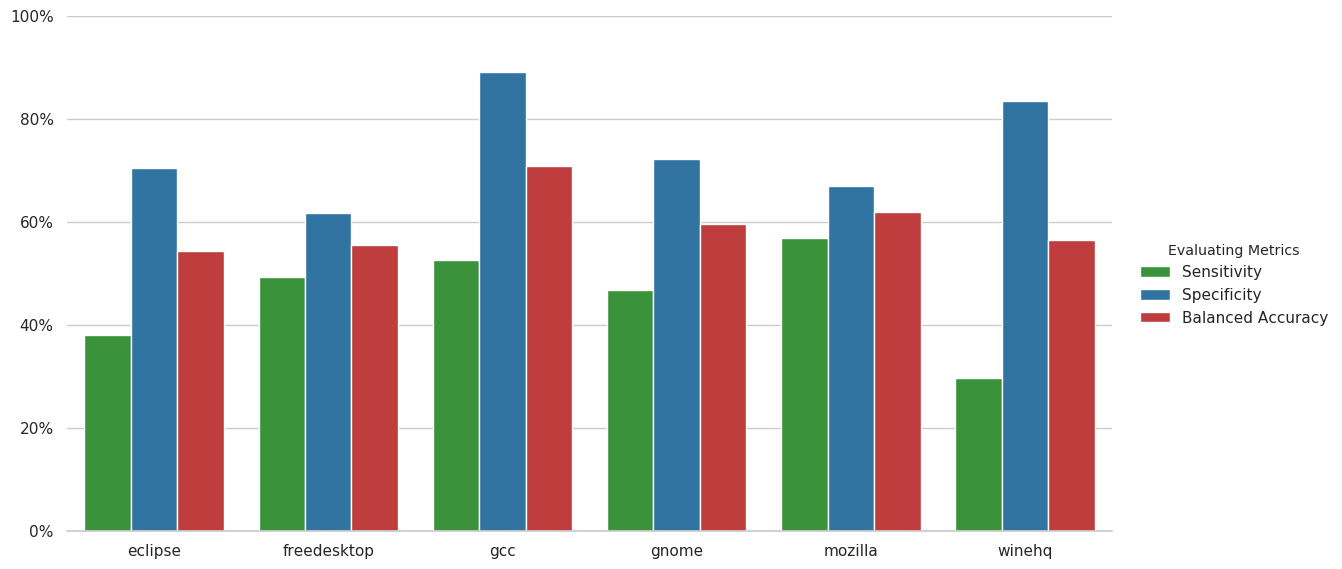

<Figure size 640x480 with 0 Axes>

In [39]:
sns.despine(offset=5)
sns.set(style="whitegrid")
e4_metrics_data_melted = e4_metrics_data[['project', 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=['project']) 
g = sns.catplot(data=e4_metrics_data_melted
                , kind="bar"
                , x="project"
                , y="value"
                , hue="variable"
                #, saturation=.5
                , height=6
                , aspect=2
                , palette=["tab:green", "tab:blue", "tab:red"])
(g.set_axis_labels("", "")
  .set_titles(" GCC: Neural Network Performance")
  .set(ylim=(0,1))
  .despine(left=True))

# Format y scale in percentage format. 
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change and ajust legend. 
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position
g._legend.set_title("Evaluating Metrics")
for t, l in zip(g._legend.texts, ['Sensitivity', 'Specificity', 'Balanced Accuracy']): t.set_text(l)

plt.show(g)
plt.savefig("figures/r4e4_performace_algorithms_on_eclipse_dataset.pdf", format="pdf", dpi=600, bbox_inches='tight')

In [34]:
from pandas import DataFrame

metrics = {'dataset': ['Eclipse', 'Freedesktop', 'Gnome', 'Mozilla', 'Gcc', 'WineHQ'],
        '% of Long-Lived Bugs': [7.7, 13.6, 14.4, 18.1, 29.2, 40.7],
        'Balanced Accuracy (%)': [54.21, 55.44, 59.48, 61.84, 70.77, 56.46]}

df = DataFrame(metrics)

print (df) 

       dataset  % of Long-Lived Bugs  Balanced Accuracy (%)
0      Eclipse                   7.7                  54.21
1  Freedesktop                  13.6                  55.44
2        Gnome                  14.4                  59.48
3      Mozilla                  18.1                  61.84
4          Gcc                  29.2                  70.77
5       WineHQ                  40.7                  56.46


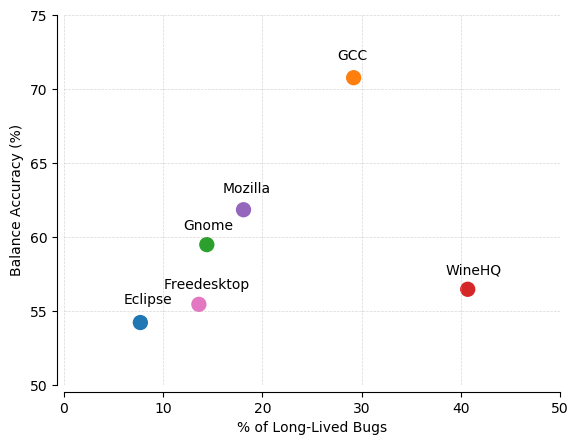

In [35]:
plt.rc('figure', figsize=(20, 20))
plt.style.use('default')

x=df['% of Long-Lived Bugs']
y=df['Balanced Accuracy (%)']

plt.scatter(x, y, s=100, color=['tab:blue', 'tab:pink', 'tab:green', 'tab:purple', 'tab:orange', 'tab:red'])
plt.xlim(0,50)
plt.ylim(50, 75)
plt.text(6, 55.5, 'Eclipse')
plt.text(10, 56.5, 'Freedesktop')
plt.text(12, 60.5, 'Gnome')
plt.text(16, 63.0, 'Mozilla')
plt.text(27.5, 72, 'GCC')
plt.text(38.5, 57.5, 'WineHQ')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('% of Long-Lived Bugs')
plt.ylabel('Balance Accuracy (%)')

sns.despine(offset=5, trim=True)


## 6.4 Tests Results

In [36]:
e4_tests_data = pd.read_csv(e4_tests_path)
bug_reports_data = pd.read_csv(bug_reports_gcc_path)
test_e4_merged_data = pd.merge(
    bug_reports_data,
    e4_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e4_merged_data.query('long_lived == "Y" and y_hat == "N"')
#correct_predicted_bugs.head()
correct_predicted_bugs.groupby('long_lived')['long_lived'].agg(['count'])

FileNotFoundError: [Errno 2] File b'datasets/rq4e4_gcc_tests_balanced_acc.csv' does not exist: b'datasets/rq4e4_gcc_tests_balanced_acc.csv'